In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler

In [15]:
from sklearn.metrics import accuracy_score,plot_confusion_matrix,classification_report, matthews_corrcoef
from sklearn.metrics import recall_score,precision_score,f1_score

In [2]:
data = pd.read_csv('D:/Career/DS_datas/fetal_health.csv')
data.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [4]:
for col in data.columns:
    print(col, data[col].nunique())

baseline value 48
accelerations 20
fetal_movement 102
uterine_contractions 16
light_decelerations 16
severe_decelerations 2
prolongued_decelerations 6
abnormal_short_term_variability 75
mean_value_of_short_term_variability 57
percentage_of_time_with_abnormal_long_term_variability 87
mean_value_of_long_term_variability 249
histogram_width 154
histogram_min 109
histogram_max 86
histogram_number_of_peaks 18
histogram_number_of_zeroes 9
histogram_mode 88
histogram_mean 103
histogram_median 95
histogram_variance 133
histogram_tendency 3
fetal_health 3


In [5]:
# these three have the least unique values -- can be considered as categorical
print(data['fetal_health'].unique())
print(data['histogram_tendency'].unique())
print(data['severe_decelerations'].unique())

[2. 1. 3.]
[ 1.  0. -1.]
[0.    0.001]


# EDA

1.0    1655
2.0     295
3.0     176
Name: fetal_health, dtype: int64

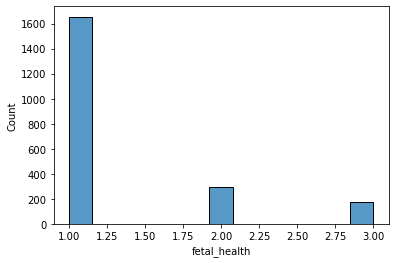

In [6]:
#checking for class Imbalance
sns.histplot(data['fetal_health'])
data["fetal_health"].value_counts()

Text(0.5, 1.0, 'Pie chart of Fetal Heath')

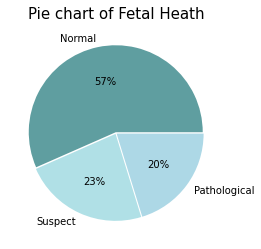

In [7]:
total = data["fetal_health"].sum()
normal = total - 471
suspect = total - 1831
pathological = total - 1950

pie_fetal_health = plt.pie([normal, suspect, pathological], labels=["Normal", "Suspect", "Pathological"], colors = ["#5F9EA0", "#B0E0E6", "#ADD8E6"],explode=[0.01,0.01,0.01], autopct="%1.0f%%")
plt.title('Pie chart of Fetal Heath', fontsize = 15)

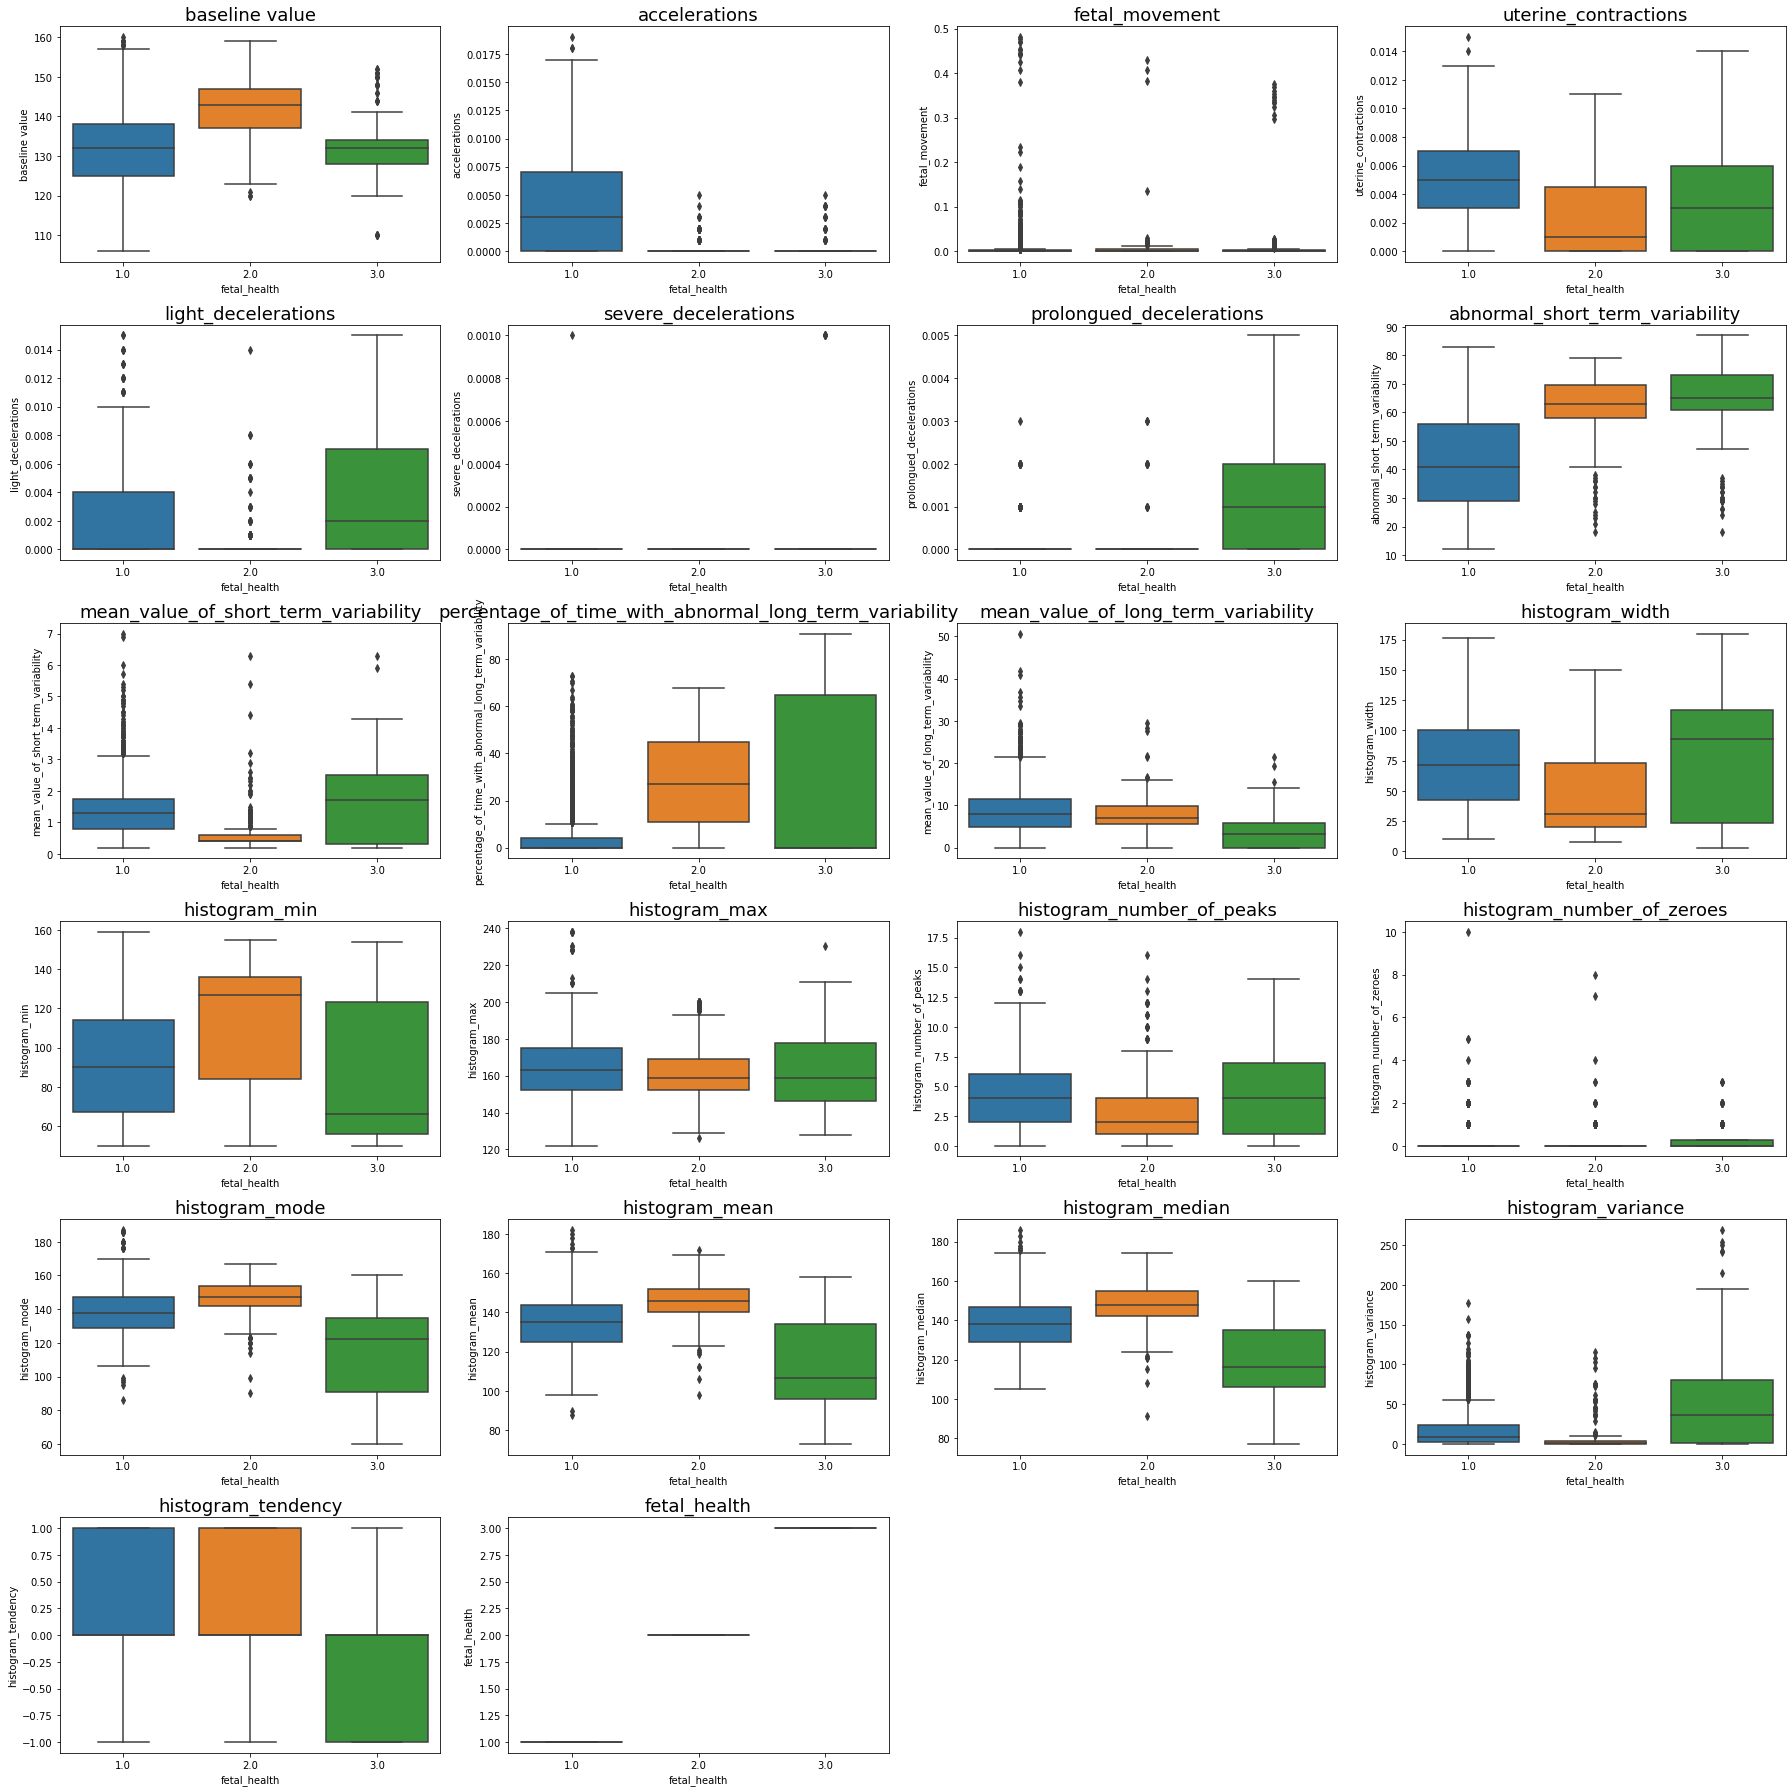

In [8]:
plt.figure(figsize=(25,25))
i=1
for col in data.columns:
    plt.subplot(6,4,i)
    sns.boxplot(x = 'fetal_health', y = col, data = data)
    plt.tight_layout()
    plt.title(col,fontsize=18)
    i+=1

Most of the box plots shows that normal (class 1) and suspect (class 2) are highly overlapping

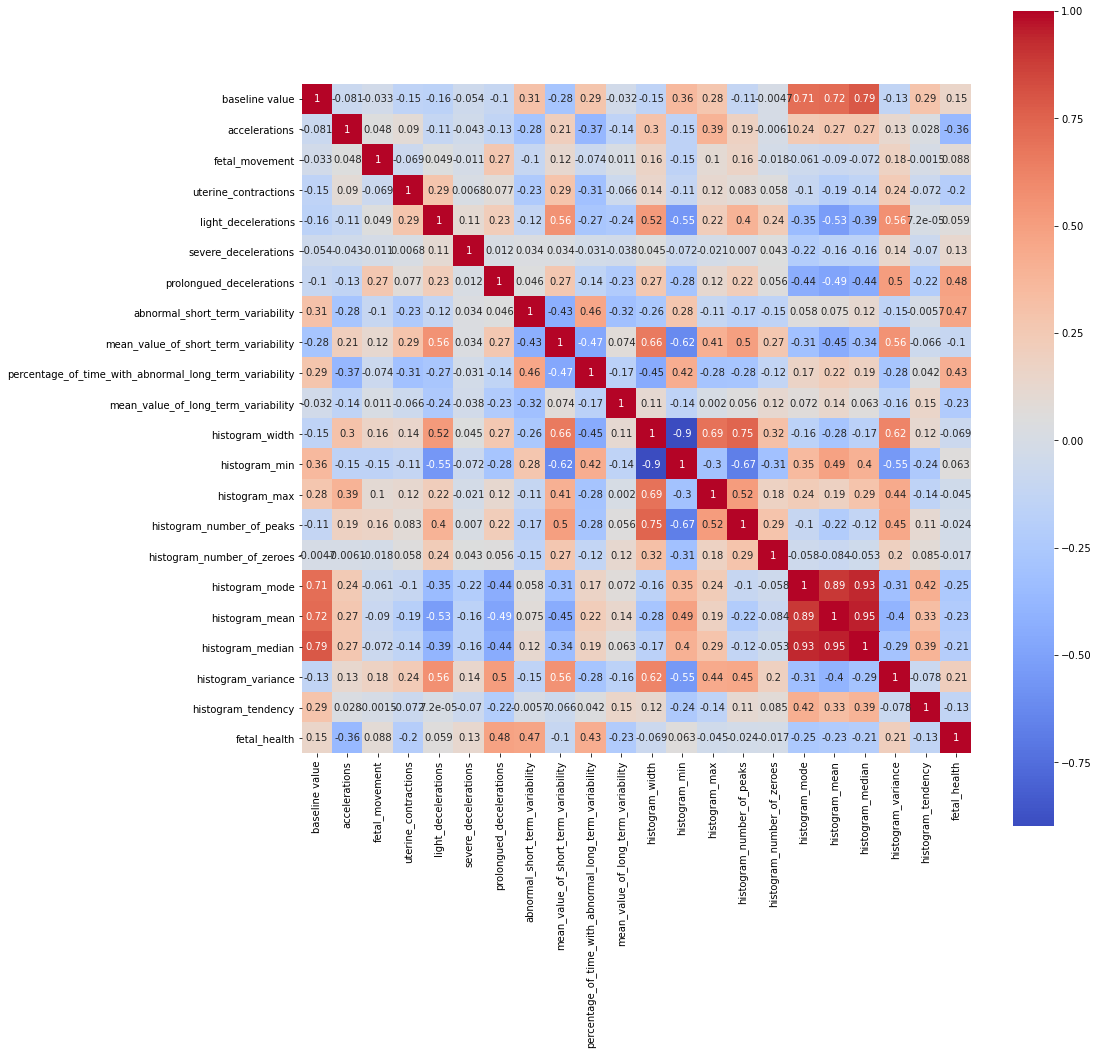

In [9]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(), square="True", annot=True, cmap= "coolwarm")
plt.show()

In [10]:
X, y = data.drop(['fetal_health'], axis=1), data['fetal_health']

array([0.8035912, 0.1964088])

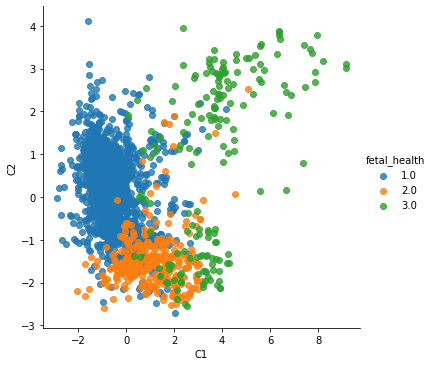

In [11]:
## Checking for LDA variations to see the separability
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=2)

lda_data_mod = lda.fit_transform(X,y)
lda_data = pd.DataFrame(data=lda_data_mod, columns=['C1', 'C2'])

lda_data = pd.concat([lda_data, y], axis=1)
sns.lmplot(x='C1', y='C2', data=lda_data, hue='fetal_health', fit_reg=False)
lda.explained_variance_ratio_

* Case 1: direct classification, letting epochs handle the class imbalance
* Case 2: dividing the problem into two sub problems, first classify 1 vs (2,3) and then 2 vs 3 --> handling class imbalance

Comparing models -- SVC, Rain Forest Classifier, Stochastic Gradient Boosting

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## SVC

accuracy is:  84.9624060150376
Accuracy score: 0.849624060150376
Classification report:
               precision    recall  f1-score   support

         1.0       0.88      0.96      0.92       413
         2.0       0.62      0.39      0.48        82
         3.0       0.79      0.62      0.70        37

    accuracy                           0.85       532
   macro avg       0.76      0.66      0.70       532
weighted avg       0.83      0.85      0.84       532

Matthew Correlation Coefficient Score: 0.5483884196611616


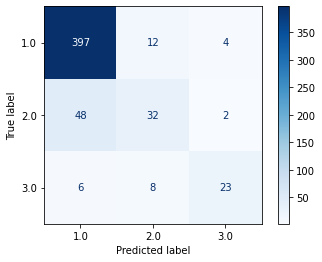

In [16]:
from sklearn.svm import SVC
svc = SVC(gamma='scale')
svc.fit(X_train, y_train)
svc_score = svc.score(X_test, y_test)
print('accuracy is: ', svc_score*100)
y_pred = svc.predict(X_test)

print("Accuracy score: {}".format(accuracy_score(y_test,y_pred)))
print("Classification report:\n {}".format(classification_report(y_test,y_pred)))
print("Matthew Correlation Coefficient Score: {}".format(matthews_corrcoef(y_test,y_pred)))
plot_confusion_matrix(svc, X_test, y_test, cmap='Blues')

## RainForest Classifier

In [17]:
from sklearn.ensemble import RandomForestClassifier
trees = [140,150,160,180]
for i in trees:
    clf = RandomForestClassifier(n_estimators=i, criterion="gini", max_depth= 5, random_state=0)
    clf.fit(X_train, y_train)
    preds = clf.predict(X_test)
    acc_sc = accuracy_score(y_test, preds, normalize=True)
    f1_sc = f1_score(y_test, preds, labels=[1,2,3], pos_label=1, average=None, zero_division='warn')
    print("accuracy ", acc_sc)
    print("f1_score ", f1_sc)

accuracy  0.9285714285714286
f1_score  [0.96103896 0.77027027 0.86956522]
accuracy  0.9285714285714286
f1_score  [0.96113074 0.76712329 0.86956522]
accuracy  0.924812030075188
f1_score  [0.95867769 0.75675676 0.86956522]
accuracy  0.924812030075188
f1_score  [0.95867769 0.75675676 0.86956522]


## Grid Search for RainForest Classifier

Best params are:  {'criterion': 'entropy', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 160, 'n_jobs': -1}
Accuracy score: 0.9398496240601504
Classification report:
               precision    recall  f1-score   support

         1.0       0.95      0.98      0.96       413
         2.0       0.90      0.74      0.81        82
         3.0       0.94      0.89      0.92        37

    accuracy                           0.94       532
   macro avg       0.93      0.87      0.90       532
weighted avg       0.94      0.94      0.94       532

Matthew Correlation Coefficient Score: 0.8312549265080807


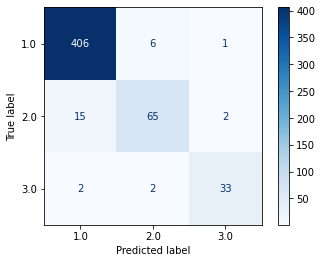

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
parameters = { 
    'n_estimators': [140,150,160,180],
    'max_features': ['auto'],
    'max_depth' : [4,6,8],
    'criterion' :['gini', 'entropy'],
    'n_jobs':[-1,None]
}

#Fitting the trainingset to find parameters with best accuracy

CV_rfc = GridSearchCV(estimator=RandomForestClassifier(), param_grid=parameters, cv= 5)
CV_rfc.fit(X_train, y_train)

print('Best params are: ', CV_rfc.best_params_)

RF_model = RandomForestClassifier(**CV_rfc.best_params_)
RF_model.fit(X_train, y_train)
#Testing the Model on test set
predictions=RF_model.predict(X_test)

print("Accuracy score: {}".format(accuracy_score(y_test,predictions)))
print("Classification report:\n {}".format(classification_report(y_test,predictions)))
print("Matthew Correlation Coefficient Score: {}".format(matthews_corrcoef(y_test,predictions)))
plot_confusion_matrix(CV_rfc, X_test, y_test, cmap='Blues')

## KNN

In [19]:
from sklearn.neighbors import KNeighborsClassifier

neighbors = [1,3,5,7,9]

for i in neighbors:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    
    predsk = knn.predict(X_test)
    
    acc_sc_knn = accuracy_score(y_test, predsk, normalize=True)
    f1_sc = f1_score(y_test, predsk, labels=[1,2,3], pos_label=1, average=None, zero_division='warn')
    print("accuracy ", acc_sc)
    print("f1_score ", f1_sc)

accuracy  0.924812030075188
f1_score  [0.93622142 0.68322981 0.77777778]
accuracy  0.924812030075188
f1_score  [0.94145759 0.67948718 0.78873239]
accuracy  0.924812030075188
f1_score  [0.93222354 0.62337662 0.7826087 ]
accuracy  0.924812030075188
f1_score  [0.94187426 0.66666667 0.78873239]
accuracy  0.924812030075188
f1_score  [0.93727811 0.63513514 0.78873239]


## XGB

In [23]:
!pip install xgboost

Accuracy score: 0.9586466165413534
Classification report:
               precision    recall  f1-score   support

         0.0       0.98      0.97      0.97       413
         1.0       0.89      0.88      0.88        82
         2.0       0.92      0.97      0.95        37

    accuracy                           0.96       532
   macro avg       0.93      0.94      0.94       532
weighted avg       0.96      0.96      0.96       532

Matthew Correlation Coefficient Score: 0.888334993953511


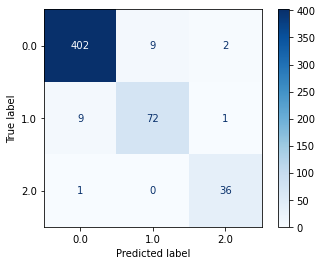

In [24]:
# in xbg the classes must start from 0
y_ = y[:]-1
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y_, test_size=0.25, random_state=42)

from xgboost import XGBClassifier
xgb = XGBClassifier(learning_rate = 0.1, max_depth = 5, n_estimators = 275, use_label_encoder=False, verbosity=0)
xgb.fit(X1_train, y1_train)
y1_pred = xgb.predict(X1_test)

print("Accuracy score: {}".format(accuracy_score(y1_test,y1_pred)))
print("Classification report:\n {}".format(classification_report(y1_test,y1_pred)))
print("Matthew Correlation Coefficient Score: {}".format(matthews_corrcoef(y1_test,y1_pred)))
plot_confusion_matrix(xgb, X1_test, y1_test, cmap='Blues')

## Stochastic Gradient Boosting

accuracy is:  96.80451127819549
Accuracy score: 0.9680451127819549
Classification report:
               precision    recall  f1-score   support

         1.0       0.97      0.99      0.98       413
         2.0       0.92      0.89      0.91        82
         3.0       1.00      0.95      0.97        37

    accuracy                           0.97       532
   macro avg       0.97      0.94      0.95       532
weighted avg       0.97      0.97      0.97       532

Matthew Correlation Coefficient Score: 0.9121701556788069


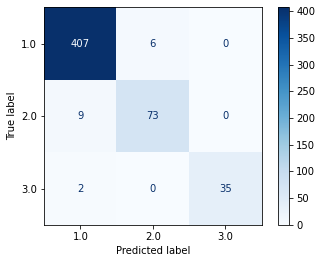

In [25]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(subsample=0.9, max_features=0.7, n_estimators=150, random_state=42)
gbc.fit(X_train, y_train)
stochastic_boost_score = gbc.score(X_test, y_test)
print('accuracy is: ', stochastic_boost_score*100)
y_pred = gbc.predict(X_test)

print("Accuracy score: {}".format(accuracy_score(y_test,y_pred)))
print("Classification report:\n {}".format(classification_report(y_test,y_pred)))
print("Matthew Correlation Coefficient Score: {}".format(matthews_corrcoef(y_test,y_pred)))
plot_confusion_matrix(gbc, X_test, y_test, cmap='Blues')

## Stochastic Gradient Boosting performed the best in separation, So for case 2, Only Stochastic Gradient Boosting will be used

In [26]:
# converting to a binary class row
def convertBinary(row):
    if row['fetal_health'] == 1:
        return 1
    else:
        return 2
data['binary_y'] = data.apply(convertBinary, axis=1)
data.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health,binary_y
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0,2
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0,1
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0,1
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0,1
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0,1


In [27]:
# splitting data for the sub cases
Xb, yb = data.drop(['binary_y'], axis=1), data['binary_y']
Xb_train, Xb_test, yb_train, yb_test = train_test_split(Xb, yb, test_size=0.25, random_state=42)

data2 = pd.concat([Xb_train, yb_train], axis=1)
data2 = data2[data2['binary_y'] == 2]

data3 = pd.concat([Xb_test, yb_test], axis=1)
data3 = data3[data3['binary_y'] == 2]

Xbb_train = data2.drop(['fetal_health', 'binary_y'], axis=1)
ybb_train = data2.fetal_health

Xbb_test = data3.drop(['fetal_health', 'binary_y'], axis=1)
ybb_test = data3.fetal_health

Xb_train = Xb_train.drop(['fetal_health'], axis=1)
Xb_test = Xb_test.drop(['fetal_health'], axis=1)

Accuracy score: 0.9642857142857143
Classification report:
               precision    recall  f1-score   support

           1       0.97      0.98      0.98       413
           2       0.94      0.90      0.92       119

    accuracy                           0.96       532
   macro avg       0.95      0.94      0.95       532
weighted avg       0.96      0.96      0.96       532

Matthew Correlation Coefficient Score: 0.8959425611625472


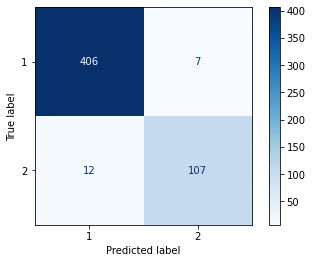

In [28]:
gbc2 = GradientBoostingClassifier(loss='deviance',subsample=0.9, max_features=0.7, n_estimators=150, learning_rate=0.4, max_depth=4, random_state=42)
gbc2.fit(Xb_train, yb_train)
stochastic_boost_score2 = gbc2.score(Xb_test, yb_test)
# print('accuracy is: ', stochastic_boost_score2*100)
yb_pred = gbc2.predict(Xb_test)

print("Accuracy score: {}".format(accuracy_score(yb_test,yb_pred)))
print("Classification report:\n {}".format(classification_report(yb_test,yb_pred)))
print("Matthew Correlation Coefficient Score: {}".format(matthews_corrcoef(yb_test,yb_pred)))
plot_confusion_matrix(gbc2, Xb_test, yb_test, cmap='Blues')

accuracy is:  98.31932773109243
Accuracy score: 0.9831932773109243
Classification report:
               precision    recall  f1-score   support

         2.0       1.00      0.98      0.99        82
         3.0       0.95      1.00      0.97        37

    accuracy                           0.98       119
   macro avg       0.97      0.99      0.98       119
weighted avg       0.98      0.98      0.98       119

Matthew Correlation Coefficient Score: 0.9620698969171088


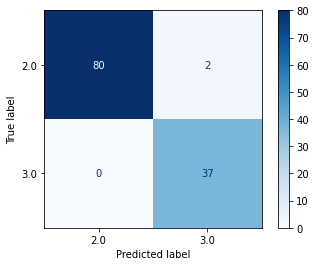

In [29]:
gbc3 = GradientBoostingClassifier(loss='deviance',subsample=0.9, max_features='auto', n_estimators=200, learning_rate=0.2, max_depth=4, random_state=42)
gbc3.fit(Xbb_train, ybb_train)
stochastic_boost_score3 = gbc3.score(Xbb_test, ybb_test)
print('accuracy is: ', stochastic_boost_score3*100)
ybb_pred = gbc3.predict(Xbb_test)

print("Accuracy score: {}".format(accuracy_score(ybb_test,ybb_pred)))
print("Classification report:\n {}".format(classification_report(ybb_test,ybb_pred)))
print("Matthew Correlation Coefficient Score: {}".format(matthews_corrcoef(ybb_test,ybb_pred)))
plot_confusion_matrix(gbc3, Xbb_test, ybb_test, cmap='Blues')

# Final F1_score of case 2 -- 98, 93 x 99 = 92.07, 93 x 97 = 90.21
##### There's slight increase in class 2's F1_score and decrease in class 3's. So we can say, there's not much of a difference.

### Now let's try another approach by selecting features using l2 regularization

In [30]:
data = pd.read_csv('D:/Career/DS_datas/fetal_health.csv')

In [31]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['fetal_health'], axis=1),
    data['fetal_health'],
    test_size=0.3,
    random_state=0)
X_train.shape, X_test.shape

((1488, 21), (638, 21))

In [32]:
scaler = StandardScaler()
scaler.fit(X_train.fillna(0))

StandardScaler()

In [33]:
sel_ = SelectFromModel(LogisticRegression(C=1, penalty='l2'))
sel_.fit(scaler.transform(X_train.fillna(0)), y_train)

SelectFromModel(estimator=LogisticRegression(C=1))

In [34]:
sel_.get_support()

array([ True,  True, False, False, False, False,  True,  True, False,
        True, False, False, False, False,  True, False, False,  True,
        True,  True, False])

In [35]:
selected_feat = X_train.columns[(sel_.get_support())]
print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
      np.sum(sel_.estimator_.coef_ == 0)))

total features: 21
selected features: 9
features with coefficients shrank to zero: 0


In [36]:
removed_cols = []
for i in range(len(X_train.columns)):
    if(sel_.get_support()[i]==False):
        removed_cols.append(X_train.columns[i])

In [37]:
X_train2 = X_train.drop(labels=removed_cols, axis=1)
X_test2 = X_test.drop(labels=removed_cols, axis=1)

In [38]:
X_train2.shape, X_test2.shape

((1488, 9), (638, 9))

In [39]:
X_train_selected = sel_.transform(X_train.fillna(0))
X_test_selected = sel_.transform(X_test.fillna(0))
X_train_selected.shape, X_test_selected.shape

((1488, 9), (638, 9))

Best params are:  {'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 140, 'n_jobs': None}
Accuracy score: 0.9388714733542319
Classification report:
               precision    recall  f1-score   support

         1.0       0.95      0.98      0.97       494
         2.0       0.87      0.70      0.77        86
         3.0       0.93      0.91      0.92        58

    accuracy                           0.94       638
   macro avg       0.92      0.87      0.89       638
weighted avg       0.94      0.94      0.94       638

Matthew Correlation Coefficient Score: 0.8311853326229753


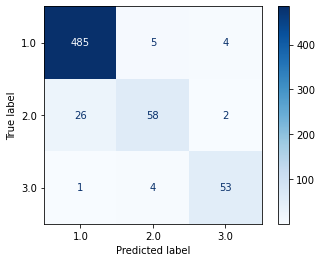

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
parameters = { 
    'n_estimators': [140,150,160,180],
    'max_features': ['auto'],
    'max_depth' : [4,6,8],
    'criterion' :['gini', 'entropy'],
    'n_jobs':[-1,None]
}

#Fitting the trainingset to find parameters with best accuracy

CV_rfc = GridSearchCV(estimator=RandomForestClassifier(), param_grid=parameters, cv= 5)
CV_rfc.fit(X_train_selected, y_train)

print('Best params are: ', CV_rfc.best_params_)

RF_model = RandomForestClassifier(**CV_rfc.best_params_)
RF_model.fit(X_train_selected, y_train)
#Testing the Model on test set
predictions=RF_model.predict(X_test_selected)

print("Accuracy score: {}".format(accuracy_score(y_test,predictions)))
print("Classification report:\n {}".format(classification_report(y_test,predictions)))
print("Matthew Correlation Coefficient Score: {}".format(matthews_corrcoef(y_test,predictions)))
plot_confusion_matrix(CV_rfc, X_test_selected, y_test, cmap='Blues')

accuracy is:  94.5141065830721
Accuracy score: 0.945141065830721
Classification report:
               precision    recall  f1-score   support

         1.0       0.96      0.98      0.97       494
         2.0       0.86      0.77      0.81        86
         3.0       0.92      0.95      0.93        58

    accuracy                           0.95       638
   macro avg       0.91      0.90      0.90       638
weighted avg       0.94      0.95      0.94       638

Matthew Correlation Coefficient Score: 0.8511217533858193


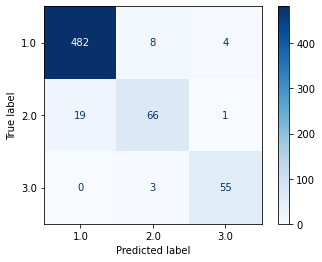

In [41]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(subsample=0.9, max_features=0.7, n_estimators=150, random_state=42)
gbc.fit(X_train_selected, y_train)
stochastic_boost_score = gbc.score(X_test_selected, y_test)
print('accuracy is: ', stochastic_boost_score*100)
y_pred = gbc.predict(X_test_selected)

print("Accuracy score: {}".format(accuracy_score(y_test,y_pred)))
print("Classification report:\n {}".format(classification_report(y_test,y_pred)))
print("Matthew Correlation Coefficient Score: {}".format(matthews_corrcoef(y_test,y_pred)))
plot_confusion_matrix(gbc, X_test_selected, y_test, cmap='Blues')